In [1]:
import torch
import numpy as np
from torch import nn
from tqdm.notebook import tqdm

# create data: features, labels

In [2]:
N = 100
num_features = 20
X = torch.randn((N, num_features))

In [3]:
X

tensor([[-1.2896, -1.1069, -1.0045,  ..., -2.0140,  0.4217,  1.7252],
        [-0.0417,  0.0668,  0.8885,  ..., -1.0643,  1.8484, -0.2358],
        [ 2.5466,  1.1229, -1.5762,  ...,  1.0475, -3.3223, -0.7077],
        ...,
        [-0.2422,  0.1317,  0.2686,  ..., -0.3201, -0.1812, -1.1544],
        [-0.6424,  0.0043, -1.4823,  ...,  0.0584, -0.3330, -0.0067],
        [ 0.0704,  0.3588, -1.1297,  ..., -0.4796,  0.7066, -2.3801]])

In [4]:
X.shape

torch.Size([100, 20])

In [5]:
X.type

<function Tensor.type>

In [6]:
y = torch.rand((N))

In [7]:
y

tensor([0.3695, 0.8351, 0.2579, 0.7028, 0.0543, 0.8436, 0.4040, 0.1677, 0.4922,
        0.2369, 0.5089, 0.8838, 0.1383, 0.7702, 0.9316, 0.7485, 0.3778, 0.1149,
        0.3046, 0.4476, 0.2030, 0.6871, 0.4479, 0.9636, 0.7867, 0.5781, 0.8497,
        0.8177, 0.1423, 0.5302, 0.3629, 0.6704, 0.7283, 0.7746, 0.6212, 0.4761,
        0.5823, 0.6072, 0.5950, 0.1035, 0.7029, 0.0188, 0.5501, 0.4739, 0.1051,
        0.4805, 0.2968, 0.8962, 0.0362, 0.9507, 0.2745, 0.5884, 0.5549, 0.5248,
        0.7867, 0.8330, 0.3301, 0.5267, 0.2334, 0.0239, 0.7162, 0.1095, 0.7487,
        0.5399, 0.2069, 0.8262, 0.6216, 0.3629, 0.1052, 0.8212, 0.5020, 0.2292,
        0.7242, 0.6021, 0.8399, 0.3205, 0.0557, 0.5681, 0.5555, 0.9932, 0.3844,
        0.5067, 0.1341, 0.2920, 0.5896, 0.4203, 0.9067, 0.2252, 0.0882, 0.7882,
        0.2191, 0.4613, 0.7739, 0.4756, 0.9649, 0.7056, 0.0246, 0.1151, 0.1499,
        0.5408])

# create a model

In [8]:
class Regression(nn.Module):
    def __init__(self, num_features):
        super(Regression, self).__init__()
        self.num_features = num_features
        self.linear = nn.Linear(self.num_features, 1)
        self.relu = nn.ReLU()
        self.loss = nn.MSELoss()
        
    def forward(self, x, y):
        out = self.relu(self.linear(x))
        loss = self.loss(out, y)
        return loss

In [9]:
lr_model = Regression(num_features)

In [10]:
loss = lr_model(X, y)
loss.backward()

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [11]:
for params in lr_model.parameters():
    print(params, params.grad)

Parameter containing:
tensor([[-0.0005,  0.1336, -0.0461,  0.0992,  0.2051,  0.0473,  0.0206, -0.0356,
         -0.0534, -0.1764,  0.0423, -0.0727, -0.0923, -0.1171, -0.1605,  0.1629,
          0.0246,  0.0221,  0.1998,  0.1101]], requires_grad=True) tensor([[-0.0368, -0.0480,  0.0586,  0.0028, -0.0285, -0.0340,  0.0464, -0.0187,
         -0.0549, -0.0250,  0.0006, -0.0628, -0.0125, -0.0709,  0.0221,  0.1224,
         -0.0203, -0.0673,  0.0577, -0.0414]])
Parameter containing:
tensor([-0.0526], requires_grad=True) tensor([-0.1333])


# training

In [12]:
learning_rate = 0.1
lr_model = Regression(num_features)
optimizer = torch.optim.Adam(lr_model.parameters(), lr=learning_rate)
epoch = 10

In [13]:
loss_list = []
for i in tqdm(range(epoch)):
    loss = lr_model(X, y)
    loss_list.append(loss.item())
#     print("loss: {}".format(loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(min(loss_list))

  0%|          | 0/10 [00:00<?, ?it/s]

0.09877490252256393


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

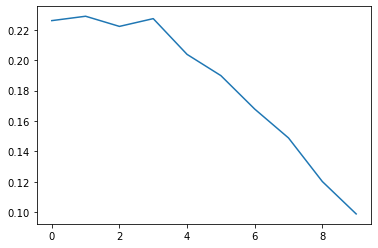

In [15]:
plt.plot(loss_list)

In [16]:
class RegressionMLP(nn.Module):
    def __init__(self, num_features):
        super(RegressionMLP, self).__init__()
        self.num_features = num_features
        self.linear1 = nn.Linear(self.num_features, 5)
        self.linear2 = nn.Linear(5, 1)
        self.relu = nn.ReLU()
        self.loss = nn.MSELoss()
        
    def forward(self, x, y):
        out = self.relu(self.linear2(self.relu(self.linear1(x))))
        loss = self.loss(out, y)
        return loss

In [17]:
learning_rate = 0.1
epoch = 10

lr_model_MLP = RegressionMLP(num_features)
optimizer1 = torch.optim.Adam(lr_model_MLP.parameters(), lr=learning_rate)

loss_list = []
for i in tqdm(range(epoch)):
    loss = lr_model_MLP(X, y)
    loss_list.append(loss.item())
#     print("loss: {}".format(loss.item()))
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
print(min(loss_list))

  0%|          | 0/10 [00:00<?, ?it/s]

0.07666045427322388


/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


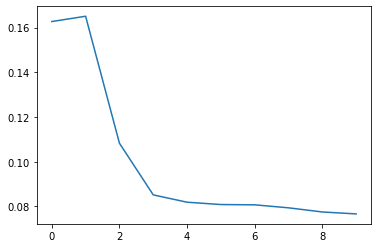

In [18]:
plt.plot(loss_list)